In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


Libraries imported successfully!


In [ ]:
parquet_file = "../data/sydney/full.parquet"

print(f"Loading Sydney housing data from {parquet_file}...")

if Path(parquet_file).exists():
    try:
        df_sydney = pd.read_parquet(parquet_file, engine='fastparquet')
    except:
        df_sydney = pd.read_parquet(parquet_file)
    
    print(f"Loaded {len(df_sydney):,} records")
    print(f"Date range: {df_sydney['settlement_date'].min().date()} to {df_sydney['settlement_date'].max().date()}")
    print(f"DataFrame shape: {df_sydney.shape}")
    print(f"Columns: {len(df_sydney.columns)} columns")
else:
    raise FileNotFoundError(f"Parquet file not found: {parquet_file}")


Loading Sydney housing data from ../data/sydney/full.parquet...
 Loaded 1,932,053 records
 Date range: 2005-01-01 to 2025-11-20
 DataFrame shape: (1932053, 27)
 Columns: 27 columns


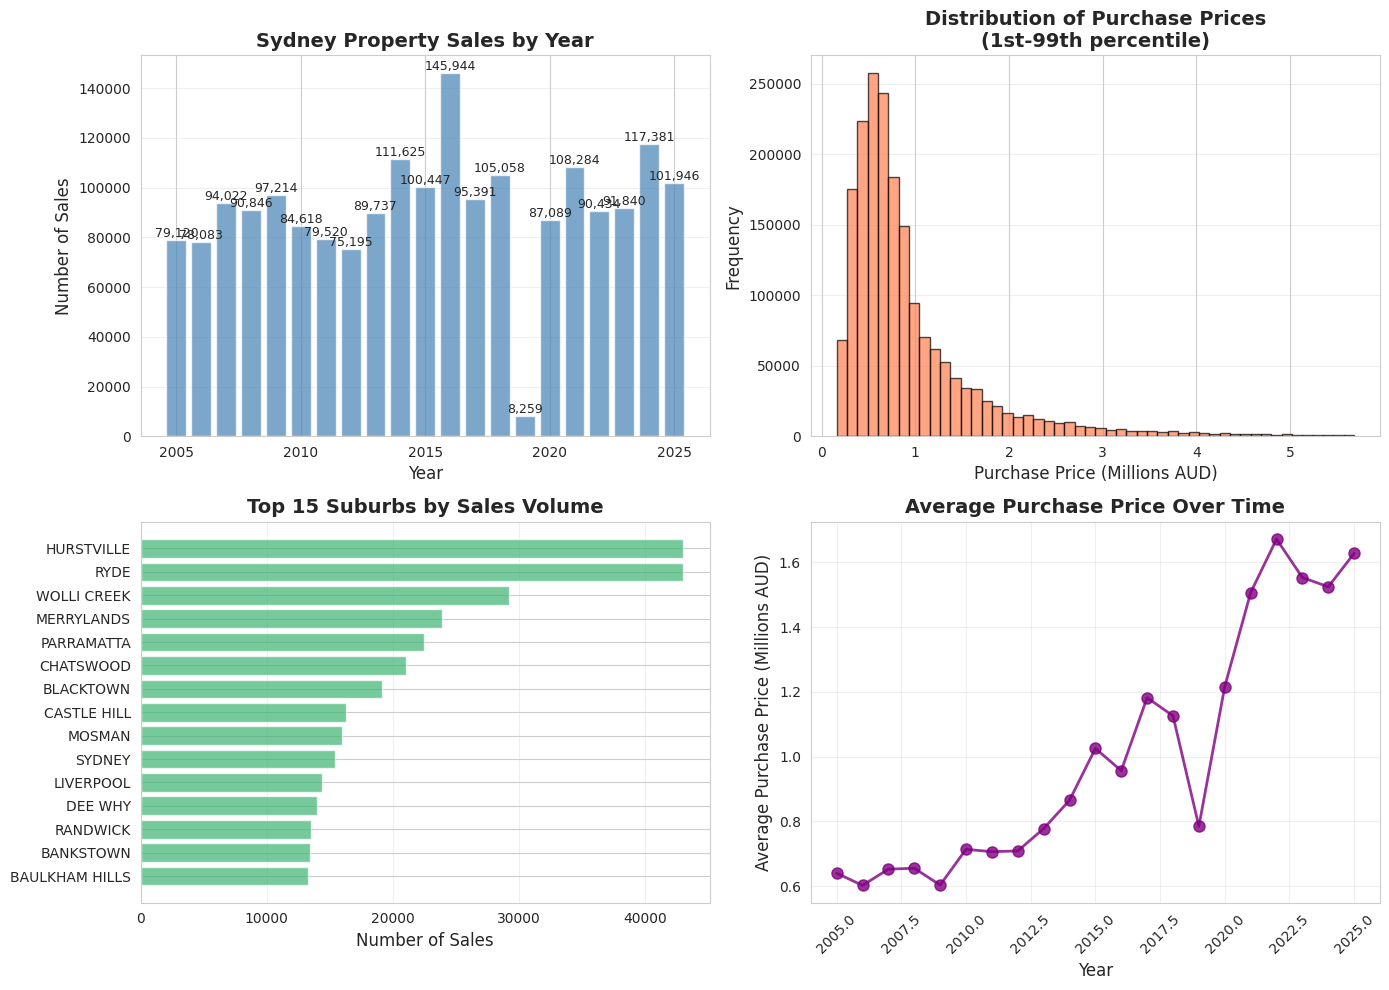


SYDNEY HOUSING DATA SUMMARY STATISTICS

Total Sales Records: 1,932,053
Date Range: 2005-01-01 to 2025-11-20

Purchase Price Statistics:
  Mean: $1,035,727.04
  Median: $700,000.00
  Min: $100.00
  Max: $770,000,000.00

Geographic Coverage:
  Unique Suburbs: 652
  Unique Postcodes: 248
  Unique District Codes: 62



In [6]:
# Basic visualizations of Sydney housing data

# 1. Records per year
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_sydney.groupby('year').size()
plt.bar(yearly_counts.index, yearly_counts.values, color='steelblue', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.title('Sydney Property Sales by Year', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for year, count in yearly_counts.items():
    plt.text(year, count, f'{count:,}', ha='center', va='bottom', fontsize=9)

# 2. Purchase price distribution (excluding outliers for better visualization)
plt.subplot(2, 2, 2)
# Filter out extreme outliers (top 1% and bottom 1%)
price_q1 = df_sydney['purchase_price'].quantile(0.01)
price_q99 = df_sydney['purchase_price'].quantile(0.99)
prices_filtered = df_sydney[(df_sydney['purchase_price'] >= price_q1) & 
                            (df_sydney['purchase_price'] <= price_q99)]['purchase_price']
plt.hist(prices_filtered / 1e6, bins=50, color='coral', alpha=0.7, edgecolor='black')
plt.xlabel('Purchase Price (Millions AUD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Purchase Prices\n(1st-99th percentile)', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# 3. Top 15 suburbs by number of sales
plt.subplot(2, 2, 3)
top_suburbs = df_sydney['property_locality'].value_counts().head(15)
plt.barh(range(len(top_suburbs)), top_suburbs.values, color='mediumseagreen', alpha=0.7)
plt.yticks(range(len(top_suburbs)), top_suburbs.index)
plt.xlabel('Number of Sales', fontsize=12)
plt.title('Top 15 Suburbs by Sales Volume', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# 4. Average purchase price by year
plt.subplot(2, 2, 4)
avg_price_by_year = df_sydney.groupby('year')['purchase_price'].mean() / 1e6
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', 
         linewidth=2, markersize=8, color='purple', alpha=0.8)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Purchase Price (Millions AUD)', fontsize=12)
plt.title('Average Purchase Price Over Time', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("SYDNEY HOUSING DATA SUMMARY STATISTICS")
print("="*60)
print(f"\nTotal Sales Records: {len(df_sydney):,}")
print(f"Date Range: {df_sydney['settlement_date'].min().date()} to {df_sydney['settlement_date'].max().date()}")
print(f"\nPurchase Price Statistics:")
print(f"  Mean: ${df_sydney['purchase_price'].mean():,.2f}")
print(f"  Median: ${df_sydney['purchase_price'].median():,.2f}")
print(f"  Min: ${df_sydney['purchase_price'].min():,.2f}")
print(f"  Max: ${df_sydney['purchase_price'].max():,.2f}")
print(f"\nGeographic Coverage:")
print(f"  Unique Suburbs: {df_sydney['property_locality'].nunique()}")
print(f"  Unique Postcodes: {df_sydney['property_post_code'].nunique()}")
print(f"  Unique District Codes: {df_sydney['district_code'].nunique()}")
print("\n" + "="*60)
